In [2]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import time

runCycles = 1000

# Function to run a command in a new terminal
def run_in_terminal(command):
    os.system(f'gnome-terminal -- bash -c "cd build && ./{command} {runCycles}"')

# Wait x seconds
def wait(x):
    time.sleep(x)

def throughput(bytes, duration):
    return ((bytes * 1000000) / duration) / (1024 * 1024)

def read_json(ipc):
    # Read map information from JSON file
    with open(f'build/json/{ipc}.json', 'r') as file:
        map_data = json.load(file)

    # Calculate the mean for each list of doubles in the throughput_map
    throughput_map = {int(key): np.mean([throughput(int(key),value) for value in values if value < 1500]) for key, values in map_data.items()}

    # Calculate the mean for each list of doubles in the latency_map
    latency_map = {int(key): np.mean([value for value in values if value < 1500]) for key, values in map_data.items()}

    # Sort the maps based on the keys in ascending order
    latency_map = {str(k)+'b' if k < 1024 else str(k // 1024)+'Kb': latency_map[k] for k in sorted(latency_map)}
    throughput_map = {str(k)+'b' if k < 1024 else str(k // 1024)+'Kb': throughput_map[k] for k in sorted(throughput_map)}

    return latency_map,throughput_map

def create_plot(map, ipc, ylabel):
    # Extract relevant information from the sorted_map
    x_values = list(map.keys())
    y_values = list(map.values())

    # Plot the data
    plt.plot(x_values, y_values)
    plt.xlabel('Message size')
    plt.ylabel(ylabel)
    plt.title(f'{ipc} IPC')
    plt.show()


In [3]:
# Compile client and server targets
os.system(f'gnome-terminal -- bash -c "/usr/bin/cmake --build ./build --config Debug --target client --"')
os.system(f'gnome-terminal -- bash -c "/usr/bin/cmake --build ./build --config Debug --target server --"')

0

# Socket IPC

In [4]:
# Run the executables
run_in_terminal('server socket')
run_in_terminal('client socket')

# Wait for the terminals to finish

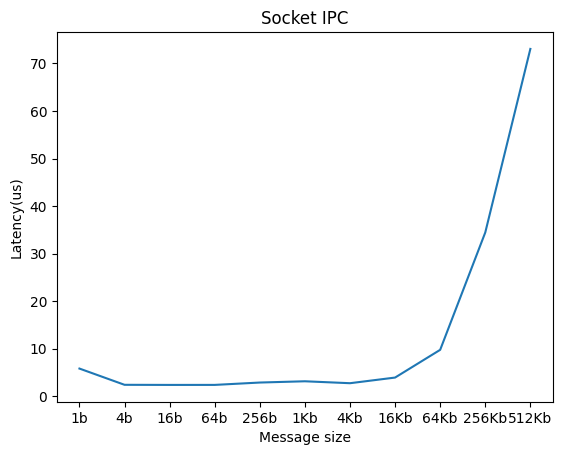

In [5]:
# Read from json
socket_latency_map, socket_throughput_map = read_json('socket')

# Plot the data
create_plot(socket_latency_map, 'Socket', 'Latency(us)')

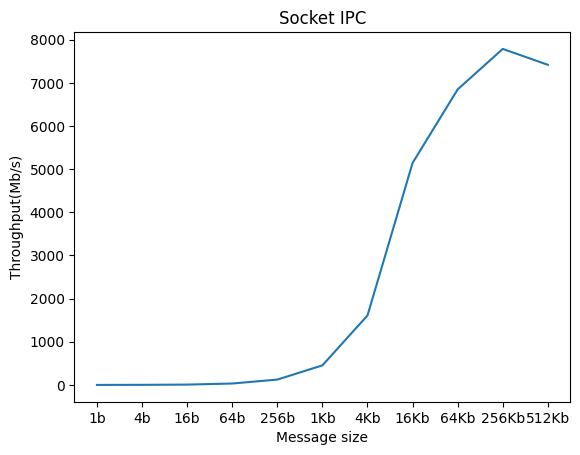

In [6]:
# Plot the data
create_plot(socket_throughput_map, 'Socket', "Throughput(Mb/s)")

# Shared Memory IPC

In [7]:
# Run the executables
run_in_terminal('server shm')
run_in_terminal('client shm')

# Wait for the terminals to finish

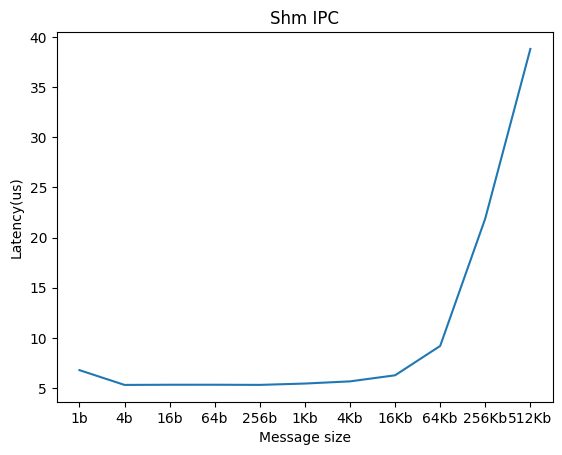

In [8]:
# Read from json
shm_latency_map, shm_throughput_map = read_json('shm')

# Plot the data
create_plot(shm_latency_map, 'Shm', 'Latency(us)')

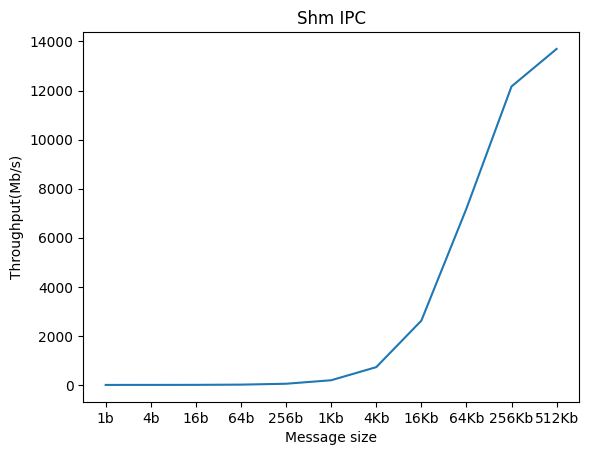

In [9]:
# Plot the data
create_plot(shm_throughput_map, 'Shm', "Throughput(Mb/s)")

# Pipe IPC

In [10]:
# Run the executables
run_in_terminal('server pipe')
run_in_terminal('client pipe')

# Wait for the terminals to finish

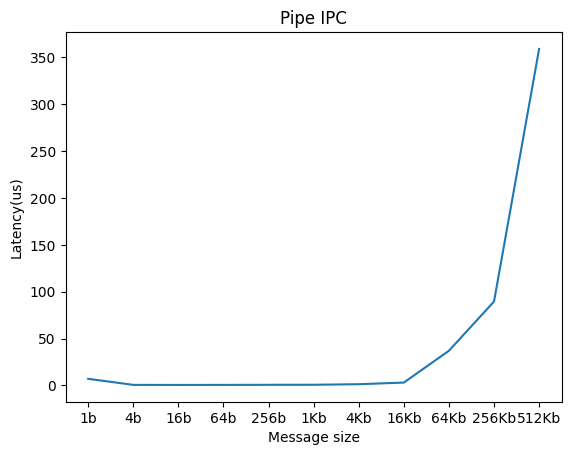

In [11]:
# Read from json
pipe_latency_map, pipe_throughput_map = read_json('pipe')

# Plot the data
create_plot(pipe_latency_map, 'Pipe', 'Latency(us)')

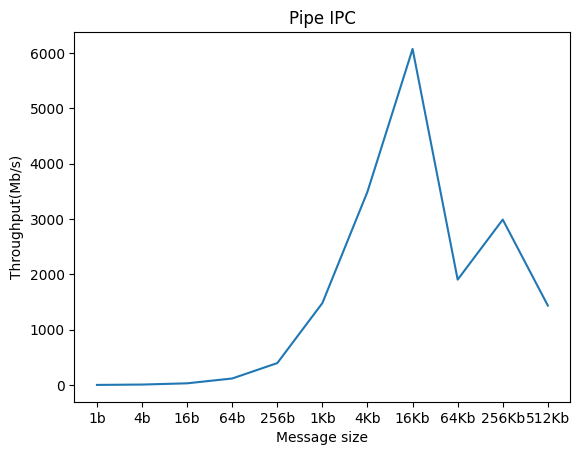

In [12]:
create_plot(pipe_throughput_map, 'Pipe', "Throughput(Mb/s)")

# Message Queue IPC

In [13]:
# Run the executables
run_in_terminal('server msgqueue')
run_in_terminal('client msgqueue')

# Wait for the terminals to finish

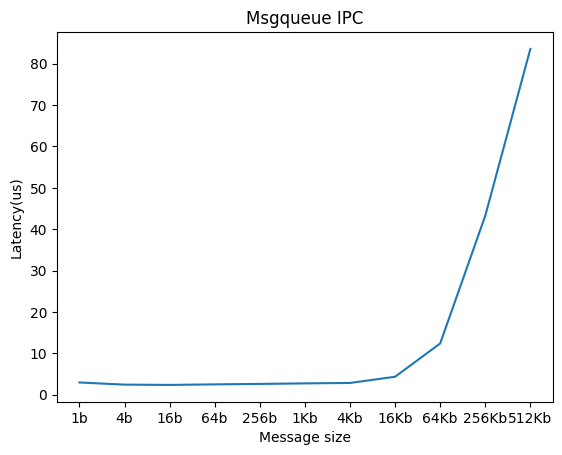

In [14]:
# Read from json
msgqueue_latency_map, msgqueue_throughput_map = read_json('msgqueue')

# Plot the data
create_plot(msgqueue_latency_map, 'Msgqueue', 'Latency(us)')

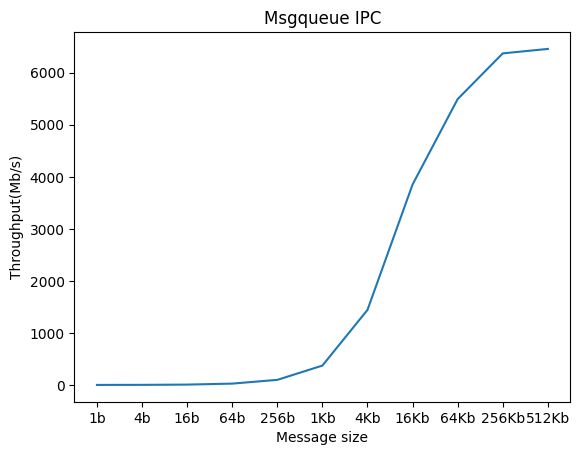

In [15]:
create_plot(msgqueue_throughput_map, 'Msgqueue', "Throughput(Mb/s)")

# File IPC

In [16]:
# Run the executables
run_in_terminal('client file')
run_in_terminal('server file')

# Wait for the terminals to finish

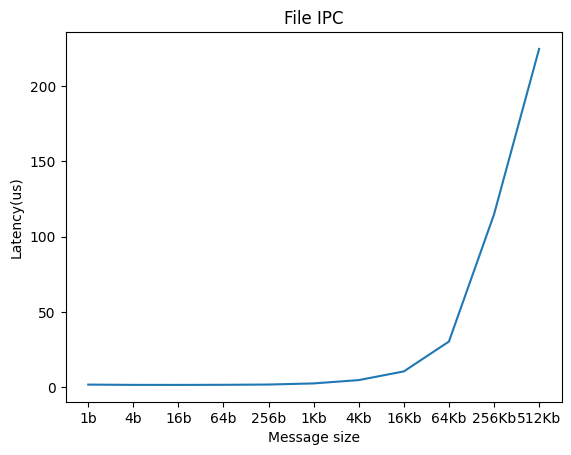

In [17]:
# Read from json
file_latency_map, file_throughput_map = read_json('file')

# Plot the data
create_plot(file_latency_map, 'File', 'Latency(us)')

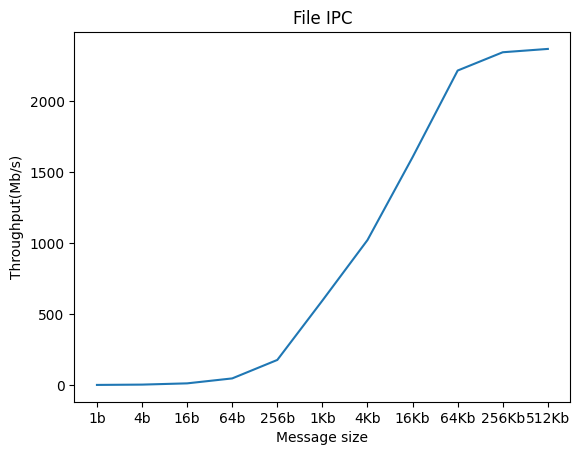

In [18]:
create_plot(file_throughput_map, 'File', "Throughput(Mb/s)")

## Final plots with all IPCs

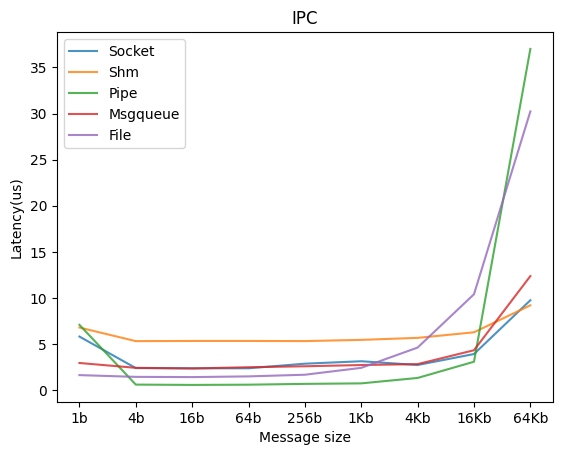

In [19]:
# Extract relevant information from the sorted_map
x_values = list(socket_latency_map.keys())
y1_values = list(socket_latency_map.values())
y2_values = list(shm_latency_map.values())
y3_values = list(pipe_latency_map.values())
y4_values = list(msgqueue_latency_map.values())
y5_values = list(file_latency_map.values())

# Plot the data
plt.plot(x_values[:9], y1_values[:9], alpha=0.8, label="Socket")
plt.plot(x_values[:9], y2_values[:9], alpha=0.8, label="Shm")
plt.plot(x_values[:9], y3_values[:9], alpha=0.8, label="Pipe")
plt.plot(x_values[:9], y4_values[:9], alpha=0.8, label="Msgqueue")
plt.plot(x_values[:9], y5_values[:9], alpha=0.8, label="File")

plt.xlabel('Message size')
plt.ylabel('Latency(us)')

plt.title('IPC')
plt.legend()
plt.show()

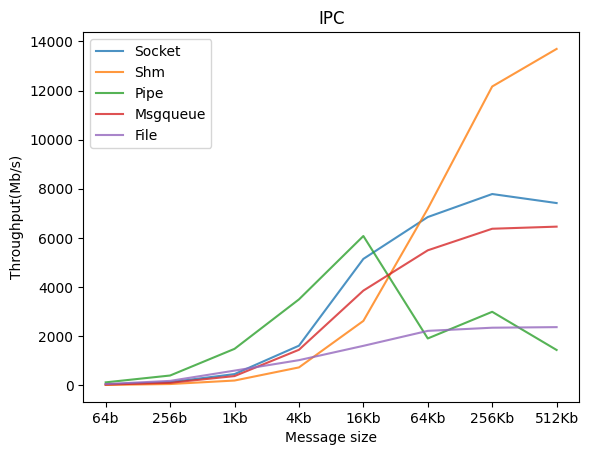

In [20]:
# Extract relevant information from the sorted_map
x_values = list(socket_throughput_map.keys())
y1_values = list(socket_throughput_map.values())
y2_values = list(shm_throughput_map.values())
y3_values = list(pipe_throughput_map.values())
y4_values = list(msgqueue_throughput_map.values())
y5_values = list(file_throughput_map.values())

# Plot the data
plt.plot(x_values[3:], y1_values[3:], alpha=0.8, label="Socket")
plt.plot(x_values[3:], y2_values[3:], alpha=0.8, label="Shm")
plt.plot(x_values[3:], y3_values[3:], alpha=0.8, label="Pipe")
plt.plot(x_values[3:], y4_values[3:], alpha=0.8, label="Msgqueue")
plt.plot(x_values[3:], y5_values[3:], alpha=0.8, label="File")

plt.xlabel('Message size')
plt.ylabel('Throughput(Mb/s)')

plt.title('IPC')
plt.legend()
plt.show()